# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Cast input array to numpy arrays for convenience
x = np.array(x)
y = np.array(y)

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [3]:
def coef_matrix(x: np.ndarray, m: int) -> np.ndarray:
    """Construct matrix with elements a_ij = x[i] ^ j"""
    return np.array([[v ** i for i in range(m + 1)] for v in x], dtype=np.float64)

def normal_system(a: np.ndarray, b: np.ndarray) -> tuple[np.ndarray]:
    """Calculate coefficients of normal equation."""
    return np.matmul(a.T, a), np.matmul(a.T, b)

def best_fitting_polynomial(x: np.ndarray, y: np.ndarray, m: int) -> list[float]:
    """Find polynomial of degree m that fits the given data best."""
    a = coef_matrix(x, m)
    b = np.array(y)
    return np.linalg.solve(*normal_system(a, b))

def calc_poly(a: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Evaluate a polynomial at specific values."""
    return np.polyval(a[::-1], x)

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_12828\3128744105.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


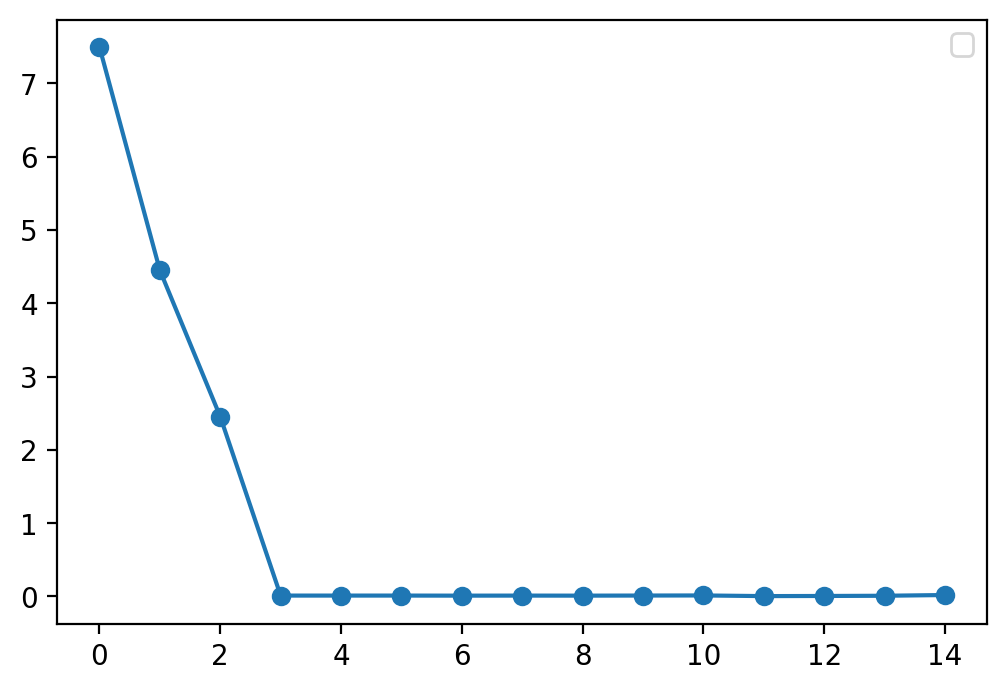

In [4]:
# Let's plot variance against polynomial's degree. We will see that after certain point variance is
# bacically zero which means polynomial start to interpolate instead of approximate given values.

M_MAX = 15

def calc_var(x: np.ndarray, y: np.ndarray, m_max: int) -> np.ndarray:
    """"Calculate variance for polynomials of various degree."""
    return np.array(
        [np.sum((calc_poly(best_fitting_polynomial(x, y, m), x) - y) ** 2) / (len(y) - m)
        for m in range(m_max)])

fig, ax = plt.subplots(dpi=200)
variances = calc_var(x, y, M_MAX)
ax.plot(range(M_MAX), variances, "-o")

ax.legend()
fig.show()

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_12828\1280461295.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


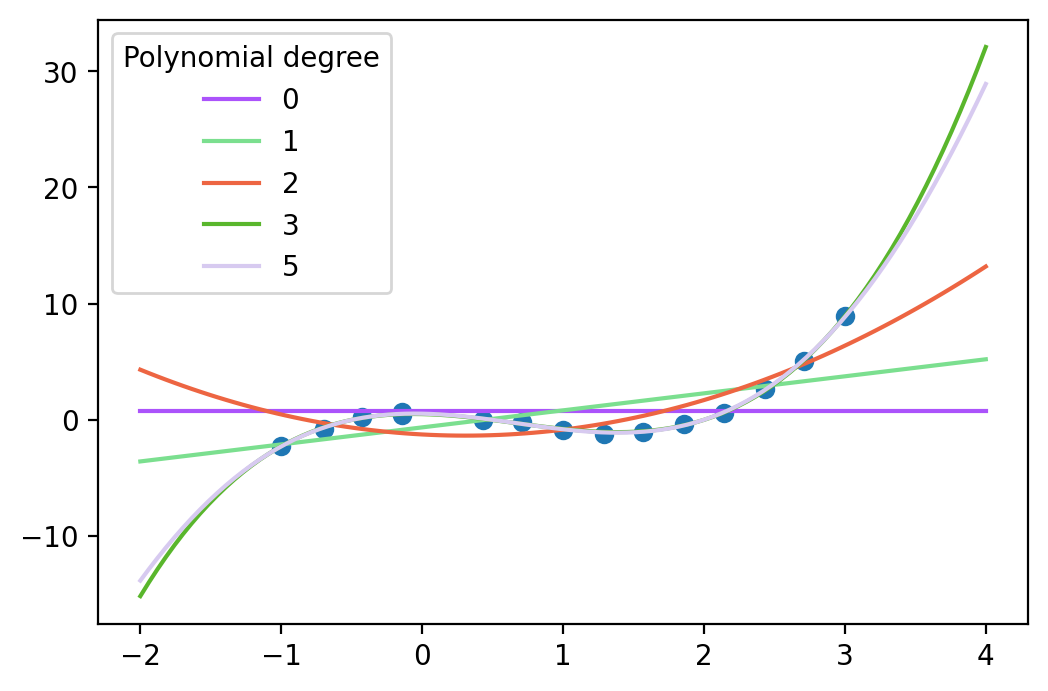

In [5]:
fig, ax = plt.subplots(dpi=200)
# Original points
ax.scatter(x, y)
# Polynomials of various degree
xgrid = np.linspace(np.min(x) - 1, np.max(x) + 1, 100)
[ax.plot(
    xgrid,
    calc_poly(best_fitting_polynomial(x, y, m), xgrid),
    c=np.random.rand(3,),
    label=f"{m}")
    for m in (0, 1, 2, 3, 5)]
ax.legend(title="Polynomial degree")
fig.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [6]:
# See the link below for quite nice explanation
# https://math.stackexchange.com/questions/3185211/what-does-qr-decomposition-have-to-do-with-least-squares-method

M_BEST = 3

def qr_best_fitting_polynomial(x: np.ndarray, y: np.ndarray, m: int = M_BEST) -> np.ndarray:
    q, r = np.linalg.qr(coef_matrix(x, m))
    return np.linalg.solve(r, np.matmul(q.T, y))

# Results calculated through different methods are close enough
bfp = best_fitting_polynomial(x, y, 3)
qrbfp = qr_best_fitting_polynomial(x, np.array(y), 3)
np.all(np.isclose(bfp, qrbfp))

True

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_12828\2064338907.py:45: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


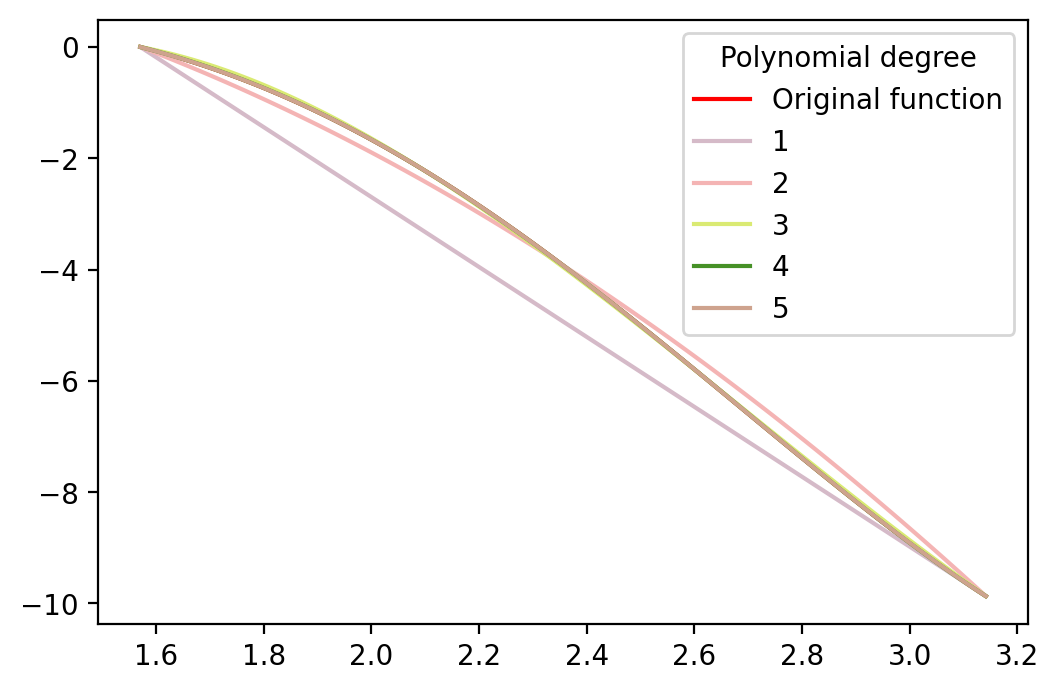

In [7]:
def my_interpolation(xgrid: np.ndarray, ygrid: np.ndarray, x: np.ndarray) -> np.ndarray:
    """Build Lagrange polynomial based on (xgrid, ygrid) and calculate its values in points x."""
    k = len(xgrid)
    res = []
    for v in x:
        s = 0.
        for i in range(k):
            p = 1.
            for j in range(k):
                if j == i:
                    continue
                p *= (v - xgrid[j]) / (xgrid[i] - xgrid[j])
            s += p *  ygrid[i]
        res.append(s)
    return np.array(res, dtype=np.float64)

def lin_interpolation(x: np.ndarray, deg: int) -> np.ndarray:
    """Calculate images of points x using Lagrange polynomial with evenly spaced grid"""
    xgrid = np.linspace(np.pi/2, np.pi, deg + 1, dtype=np.float64)
    ygrid = xgrid ** 2 * np.cos(xgrid)
    return my_interpolation(xgrid, ygrid, x)

def cheb_interpolation(x: np.ndarray, deg: int) -> np.ndarray:
    """Calculate images of points x using Lagrange polynomial with chebyshev nodes grid"""
    xgrid = np.polynomial.chebyshev.chebroots([0] * (deg + 1) + [1])
    # Rescale bc chebroots are from [-1; 1] interval.
    xgrid = 3 * np.pi / 4 + np.pi / 4 * xgrid
    ygrid = xgrid ** 2 * np.cos(xgrid)
    return my_interpolation(xgrid, ygrid, x)


# Plots for various degree polynomials based on unversal grid.
x = np.linspace(np.pi/2, np.pi, 100)

fig, ax = plt.subplots(dpi=200)
ax.plot(x, x ** 2 * np.cos(x), c="red", label="Original function")
[ax.plot(
    x,
    lin_interpolation(x, deg),
    c=np.random.rand(3,),
    label=f"{deg}")
    for deg in (1, 2, 3, 4, 5)]

ax.legend(title="Polynomial degree")
fig.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_12828\2052091237.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


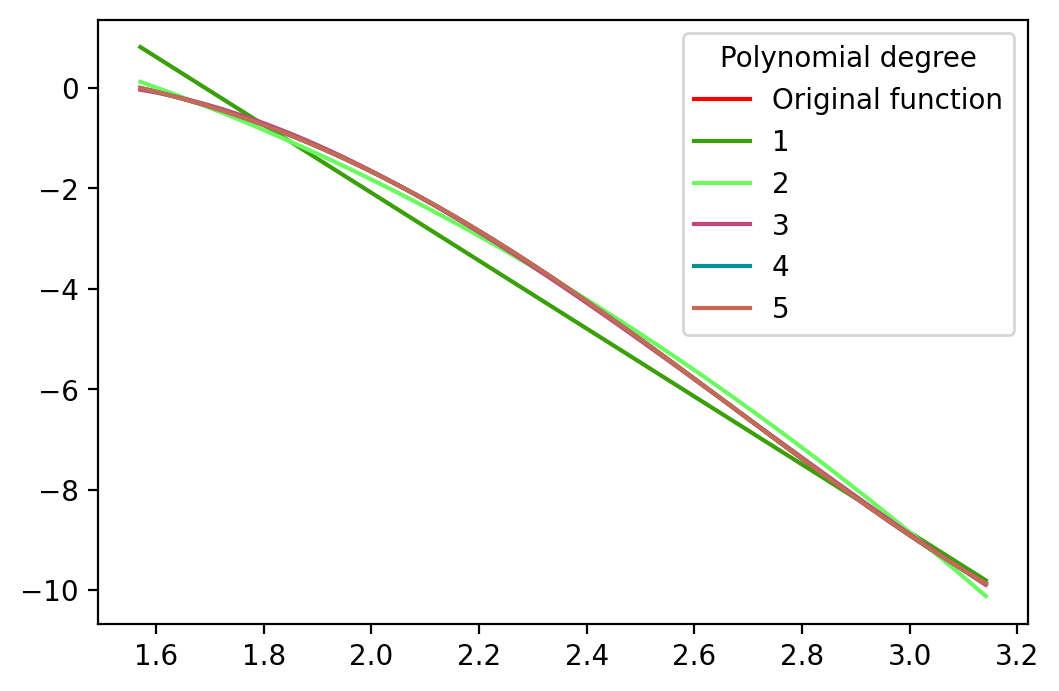

In [8]:
# Plots for various degree polynomials based on chebyshev-nodes grid.
x = np.linspace(np.pi/2, np.pi, 100)

fig, ax = plt.subplots(dpi=200)
ax.plot(x, x ** 2 * np.cos(x), c="red", label="Original function")
[ax.plot(
    x,
    cheb_interpolation(x, deg),
    c=np.random.rand(3,),
    label=f"{deg}")
    for deg in (1, 2, 3, 4, 5)]

ax.legend(title="Polynomial degree")
fig.show()

C:\Users\Wicirelllis\AppData\Local\Temp\ipykernel_12828\2114506283.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


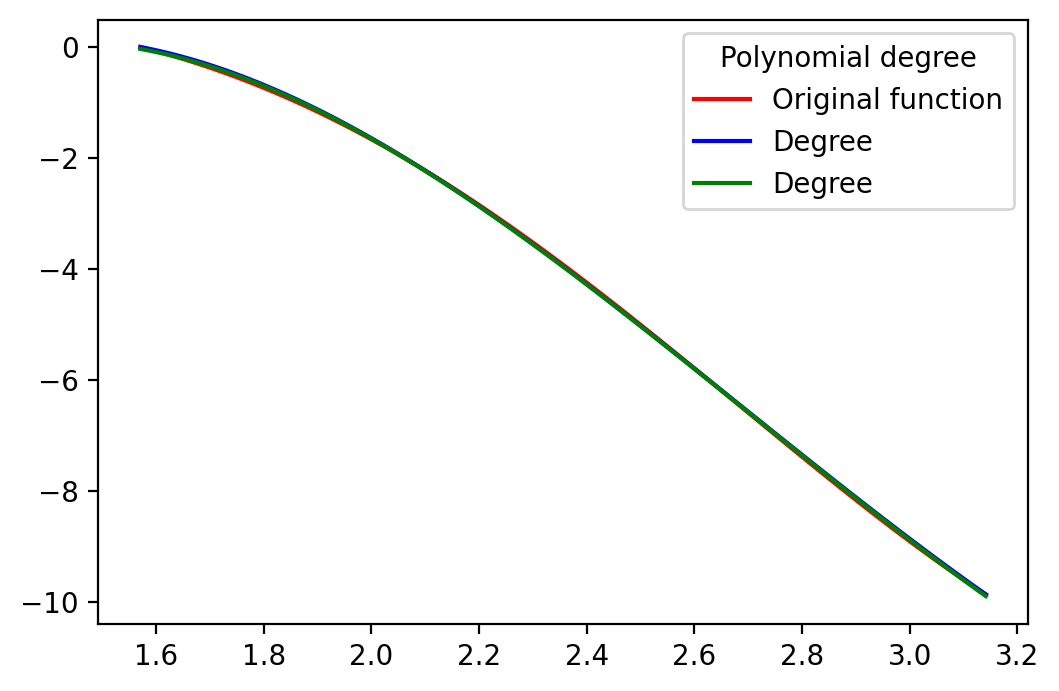

In [9]:
# Let's compare interpolation with universal grid and chebyshev-nodes grid. We will see they are
# pretty much indistinguishable. I would guess the example should demonstrate issues with universal
# grid, like Runge's phenomenon, bc it's included in the notebook.

x = np.linspace(np.pi/2, np.pi, 100)

fig, ax = plt.subplots(dpi=200)
ax.plot(x, x ** 2 * np.cos(x), c="red", label="Original function")
ax.plot(x, lin_interpolation(x, 3), c="blue", label=f"Degree")
ax.plot(x, cheb_interpolation(x, 3), c="green", label=f"Degree")

ax.legend(title="Polynomial degree")
fig.show()